In [21]:
import ROOT
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [22]:
data_h_rest = pd.read_csv('particle_momentum.csv')
data_Z_rest = pd.read_csv('transformed_momentum(ZRestFrame).csv')

In [23]:
import pandas as pd

# Input file
input_file = "particle_velocity.csv"  # Replace with your actual file name

# Output file
output_file = "z_boson_velocity.csv"

# Read the data
data = pd.read_csv(input_file)

# Filter rows for Z Bosons
z_boson_data = data[data["Particle"] == "Z Boson"]

# Select required columns: Event, Px, Py, Pz
z_boson_velocity = z_boson_data[["Event", "Vx", "Vy", "Vz"]]

# Save the extracted data to a CSV file
z_boson_velocity.to_csv(output_file, index=False)

print(f"Z boson momentum data saved to {output_file}.")


Z boson momentum data saved to z_boson_velocity.csv.


In [24]:
import pandas as pd

# Read the input CSV file
data = pd.read_csv("particle_velocity.csv")

# Filter the events containing Z Boson, Higgs, Electron+, and Photon
relevant_events = data[
    (data['Particle'] == 'Electron-') &
    (data['Event'].isin(data[data['Particle'] == 'Higgs']['Event'])) &
    (data['Event'].isin(data[data['Particle'] == 'Electron+']['Event'])) &
    (data['Event'].isin(data[data['Particle'] == 'Photon']['Event']))
]['Event'].unique()

# Filter the Electron- momentum for these events
Z_velocities = data[(data['Event'].isin(relevant_events)) & (data['Particle'] == 'Z Boson')]

# Select relevant columns (Event, Px, Py, Pz)
Z_velocity = Z_velocities[['Event', 'Vx', 'Vy', 'Vz']]

# Save the filtered data to a new CSV file
Z_velocity.to_csv("z_velocity_SelectedEvents.csv", index=False)

print("Filtered Electron- momentum data saved to 'z_velocity_SelectedEvents.csv'")

Filtered Electron- momentum data saved to 'z_velocity_SelectedEvents.csv'


In [25]:
import pandas as pd

# Input file
input_file = "transformed_velocity(ZRestFrame).csv"  # Replace with your actual file name

# Output file
output_file = "em_velocity(ZRestFrame).csv"

# Read the data
data = pd.read_csv(input_file)

# Filter rows for Z Bosons
em_data = data[data["Particle"] == "Electron-"]

# Select required columns: Event, Px, Py, Pz
em_velocity = em_data[["Event", "Vx", "Vy", "Vz"]]

# Save the extracted data to a CSV file
em_velocity.to_csv(output_file, index=False)

print(f"Electron momentum data saved to {output_file}.")

Electron momentum data saved to em_velocity(ZRestFrame).csv.


In [26]:
import pandas as pd

# Read the input CSV file
data = pd.read_csv("transformed_velocity(ZRestFrame).csv")

# Filter the events containing Z Boson, Higgs, Electron+, and Photon
relevant_events = data[
    (data['Particle'] == 'Z Boson') &
    (data['Event'].isin(data[data['Particle'] == 'Higgs']['Event'])) &
    (data['Event'].isin(data[data['Particle'] == 'Electron+']['Event'])) &
    (data['Event'].isin(data[data['Particle'] == 'Photon']['Event']))
]['Event'].unique()

# Filter the Electron- momentum for these events
electron_minus_velocities = data[(data['Event'].isin(relevant_events)) & (data['Particle'] == 'Electron-')]

# Select relevant columns (Event, Px, Py, Pz)
em_velocity = electron_minus_velocities[['Event', 'Vx', 'Vy', 'Vz']]

# Save the filtered data to a new CSV file
em_velocity.to_csv("em_velocity_SelectedEvents(ZRestFrame).csv", index=False)

print("Filtered Electron- momentum data saved to 'em_velocity_SelectedEvents(ZRestFrame).csv'")

Filtered Electron- momentum data saved to 'em_velocity_SelectedEvents(ZRestFrame).csv'


In [27]:
import numpy as np
import pandas as pd

# Read the electron and Z boson velocity data
electron_data = pd.read_csv("em_velocity(ZRestFrame).csv")
z_boson_data = pd.read_csv("z_boson_velocity.csv")

# Initialize an empty list to store the angles
angles = []

# Loop through each event to compute the angle
for i, event in electron_data.iterrows():
    # Get the velocities of the electron and Z boson for the current event
    v_electron = np.array([event['Vx'], event['Vy'], event['Vz']])
    z_event = z_boson_data.iloc[i]
    v_z_boson = np.array([z_event['Vx'], z_event['Vy'], z_event['Vz']])
    
    # Calculate the dot product and magnitudes of the vectors
    dot_product = np.dot(v_electron, v_z_boson)
    mag_electron = np.linalg.norm(v_electron)
    mag_z_boson = np.linalg.norm(v_z_boson)
    
    # Calculate the cosine of the angle
    cos_theta = dot_product / (mag_electron * mag_z_boson)
    
    # Calculate the angle in radians and then convert to degrees
    angle_rad = np.arccos(cos_theta)
    angle_deg = np.degrees(angle_rad)
    
    # Append the angle to the list
    angles.append([electron_data.iloc[i]['Event'], angle_deg])

# Create a DataFrame for the angles
angle_df = pd.DataFrame(angles, columns=['Event', 'Angle (degrees)'])

# Save the angles to a CSV file
angle_df.to_csv('angles_Z&em.csv', index=False)


In [28]:
import pandas as pd
import numpy as np

# Read the input CSV files
z_boson_data = pd.read_csv("z_velocity_SelectedEvents.csv")
electron_data = pd.read_csv("em_velocity_SelectedEvents(ZRestFrame).csv")

# Merge the data based on the Event column
merged_data = pd.merge(z_boson_data, electron_data, on="Event", suffixes=("_z", "_e"))

# Calculate the angle between Z Boson and Electron
# Dot product: Vz \u00b7 Ve = Vx_z * Vx_e + Vy_z * Vy_e + Vz_z * Vz_e
# Magnitudes: |Vz| = sqrt(Vx_z^2 + Vy_z^2 + Vz_z^2), |Ve| = sqrt(Vx_e^2 + Vy_e^2 + Vz_e^2)
merged_data["Dot_Product"] = (
    merged_data["Vx_z"] * merged_data["Vx_e"] +
    merged_data["Vy_z"] * merged_data["Vy_e"] +
    merged_data["Vz_z"] * merged_data["Vz_e"]
)
merged_data["Magnitude_Z"] = np.sqrt(
    merged_data["Vx_z"]**2 + merged_data["Vy_z"]**2 + merged_data["Vz_z"]**2
)
merged_data["Magnitude_E"] = np.sqrt(
    merged_data["Vx_e"]**2 + merged_data["Vy_e"]**2 + merged_data["Vz_e"]**2
)
merged_data["Cos_Theta"] = merged_data["Dot_Product"] / (merged_data["Magnitude_Z"] * merged_data["Magnitude_E"])
merged_data["Angle"] = np.arccos(merged_data["Cos_Theta"]) * (180 / np.pi)  # Convert to degrees

# Save the result to a new CSV file
merged_data[["Event", "Angle"]].to_csv("z_boson_electron_angles(SelectedEvents).csv", index=False)

print("Angles between Z Boson and Electron saved to 'z_boson_electron_angles(SelectedEvents).csv'")


Angles between Z Boson and Electron saved to 'z_boson_electron_angles(SelectedEvents).csv'


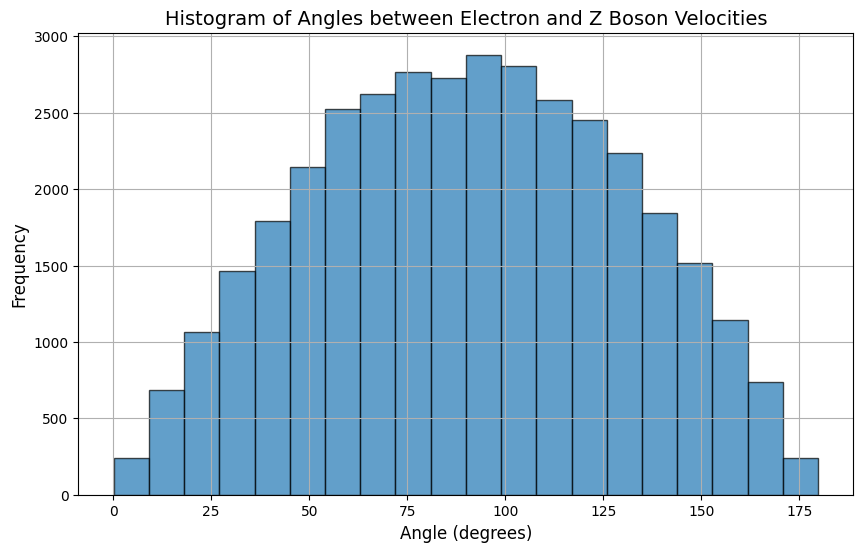

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the angles CSV file (assuming it was generated by the previous code)
angles_df = pd.read_csv("angles_Z&em.csv")

# Extract the angles for plotting
angles = angles_df['Angle (degrees)']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(angles, bins=20, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Angle (degrees)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Angles between Electron and Z Boson Velocities', fontsize=14)

# Show grid
plt.grid(True)

# Display the plot
plt.show()


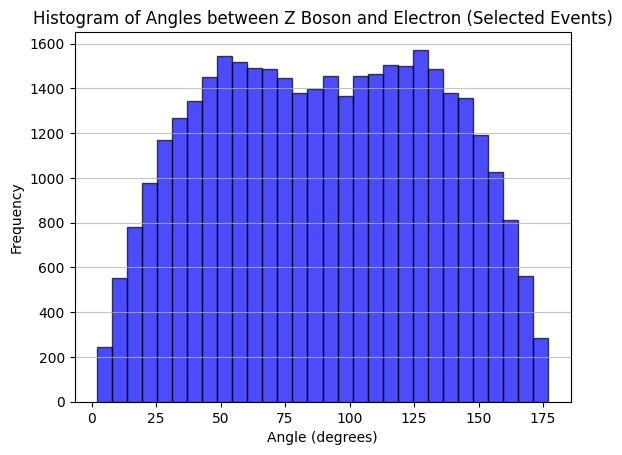

Histogram of angles plotted and saved to 'angle_histogram_from_csv.png'


In [30]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the input CSV file containing angles
data = pd.read_csv("z_boson_electron_angles(SelectedEvents).csv")

# Plot the histogram of angles
plt.hist(data["Angle"], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of Angles between Z Boson and Electron (Selected Events)")
plt.xlabel("Angle (degrees)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.savefig("angle_histogram_from_csv.png")
plt.show()

print("Histogram of angles plotted and saved to 'angle_histogram_from_csv.png'")


Best polynomial (degree 10):
0.001363109116201x^0 + -0.000146051115861x^1 + 0.000041738724015x^2 + -0.000002449065734x^3 + 0.000000078298328x^4 + -0.000000001535840x^5 + 0.000000000019007x^6 + -0.000000000000148x^7 + 0.000000000000001x^8 + -0.000000000000000x^9 + 0.000000000000000x^10


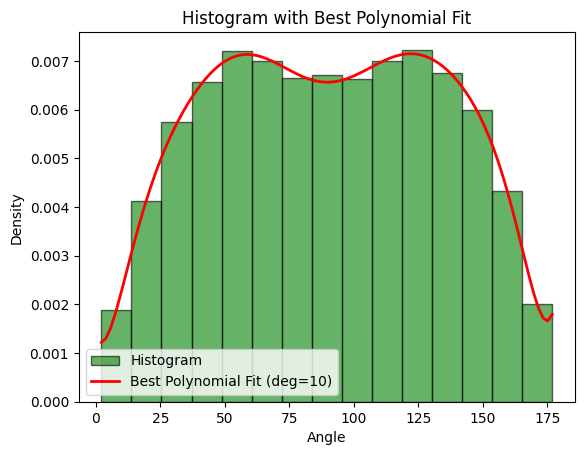

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Load data from a CSV file
file_path = "z_boson_electron_angles(SelectedEvents).csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Ensure the CSV has an 'Angle' column
if 'Angle' not in data.columns:
    raise ValueError("The CSV file must contain an 'Angle' column.")

# Step 2: Plot the histogram
plt.hist(data['Angle'], bins=15, density=True, alpha=0.6, color='g', label='Histogram', edgecolor='black')

# Step 3: Fit polynomials of various degrees and choose the best fit
x = np.linspace(data['Angle'].min(), data['Angle'].max(), 100)
y, bin_edges = np.histogram(data['Angle'], bins=15, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

best_degree = None
best_fit = None
lowest_error = float('inf')
best_coeffs = None

# Test polynomial degrees from 1 to 10
for degree in range(1, 11):
    coeffs = np.polyfit(bin_centers, y, degree)
    poly_fit = np.poly1d(coeffs)
    error = mean_squared_error(y, poly_fit(bin_centers))
    if error < lowest_error:
        best_degree = degree
        best_fit = poly_fit
        best_coeffs = coeffs
        lowest_error = error

# Print the explicit form of the best polynomial
print(f"Best polynomial (degree {best_degree}):")
print(" + ".join([f"{coeff:.15f}x^{i}" for i, coeff in enumerate(reversed(best_coeffs))]))

# Step 4: Overlay the best polynomial fit curve
plt.plot(x, best_fit(x), 'r-', linewidth=2, label=f'Best Polynomial Fit (deg={best_degree})')

# Customize plot
plt.title('Histogram with Best Polynomial Fit')
plt.xlabel('Angle')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


Best polynomial (degree 10, scaled):
0.190735044352785x^0 + -0.020436416813880x^1 + 0.005840352237119x^2 + -0.000342689118395x^3 + 0.000010956008495x^4 + -0.000000214904616x^5 + 0.000000002659613x^6 + -0.000000000020738x^7 + 0.000000000000099x^8 + -0.000000000000000x^9 + 0.000000000000000x^10
Polynomial in terms of sin and cos(theta):
0.190735044352785 * cos(10*theta) + -0.020436416813880 * sin(9*theta) + 0.005840352237119 * cos(8*theta) + -0.000342689118395 * sin(7*theta) + 0.000010956008495 * cos(6*theta) + -0.000000214904616 * sin(5*theta) + 0.000000002659613 * cos(4*theta) + -0.000000000020738 * sin(3*theta) + 0.000000000000099 * cos(2*theta) + -0.000000000000000 * sin(1*theta) + 0.000000000000000 * cos(0*theta)


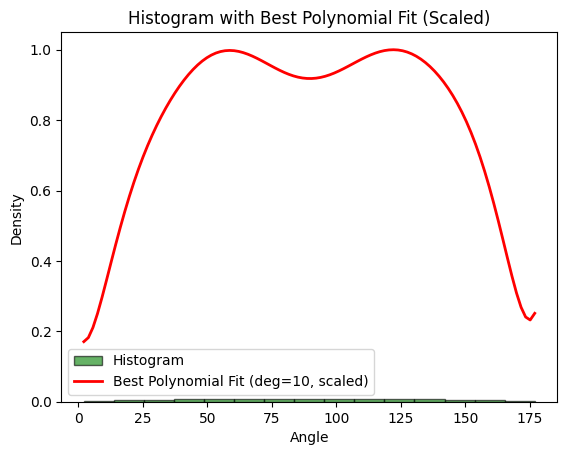

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Load data from a CSV file
file_path = "z_boson_electron_angles(SelectedEvents).csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Ensure the CSV has an 'Angle' column
if 'Angle' not in data.columns:
    raise ValueError("The CSV file must contain an 'Angle' column.")

# Step 2: Plot the histogram
plt.hist(data['Angle'], bins=15, density=True, alpha=0.6, color='g', label='Histogram', edgecolor='black')

# Step 3: Fit polynomials of various degrees and choose the best fit
x = np.linspace(data['Angle'].min(), data['Angle'].max(), 100)
y, bin_edges = np.histogram(data['Angle'], bins=15, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

best_degree = None
best_fit = None
lowest_error = float('inf')
best_coeffs = None

# Test polynomial degrees from 1 to 10
for degree in range(1, 11):
    coeffs = np.polyfit(bin_centers, y, degree)
    poly_fit = np.poly1d(coeffs)
    error = mean_squared_error(y, poly_fit(bin_centers))
    if error < lowest_error:
        best_degree = degree
        best_fit = poly_fit
        best_coeffs = coeffs
        lowest_error = error

# Scale the polynomial so its maximum value is 1
scaling_factor = max(best_fit(x))
best_fit_scaled = lambda x: best_fit(x) / scaling_factor
scaled_coeffs = [coeff / scaling_factor for coeff in best_coeffs]

# Print the explicit form of the scaled best polynomial
print(f"Best polynomial (degree {best_degree}, scaled):")
print(" + ".join([f"{coeff:.15f}x^{i}" for i, coeff in enumerate(reversed(scaled_coeffs))]))

# Step 4: Convert the polynomial to sin and cos terms
def polynomial_to_trig(coeffs, degree):
    trig_terms = []
    for i, coeff in enumerate(reversed(coeffs)):
        power = degree - i
        if power % 2 == 0:
            trig_terms.append(f"{coeff:.15f} * cos({power}*theta)")
        else:
            trig_terms.append(f"{coeff:.15f} * sin({power}*theta)")
    return " + ".join(trig_terms)

# Convert the polynomial expression to sin and cos terms
polynomial_trig = polynomial_to_trig(scaled_coeffs, best_degree)

print(f"Polynomial in terms of sin and cos(theta):")
print(polynomial_trig)

# Step 5: Overlay the scaled best polynomial fit curve
plt.plot(x, best_fit_scaled(x), 'r-', linewidth=2, label=f'Best Polynomial Fit (deg={best_degree}, scaled)')

# Customize plot
plt.title('Histogram with Best Polynomial Fit (Scaled)')
plt.xlabel('Angle')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


Best polynomial (degree 10, scaled):
0.190735044379938x^0 + -1.170920432216446x^1 + 19.172745412585542x^2 + -64.456721433370035x^3 + 118.070904430113472x^4 + -132.696328544568132x^5 + 94.092339613757531x^6 + -42.035706091655051x^7 + 11.457055018703803x^8 + -1.739340629253411x^9 + 0.112742030339069x^10
Polynomial in terms of sin(x) and cos(x):
0.190735044379938 * x^10 + -1.170920432216446 * x^9 + 19.172745412585542 * x^8 + -64.456721433370035 * x^7 + 118.070904430113472 * x^6 + -132.696328544568132 * x^5 + 94.092339613757531 * x^4 + -42.035706091655051 * sin(x)^3 + -42.035706091655051 * cos(x)^3 + 11.457055018703803 * sin(x)^2 + 11.457055018703803 * cos(x)^2 + -1.739340629253411 * sin(x) + -1.739340629253411 * cos(x) + 0.112742030339069 * x^0


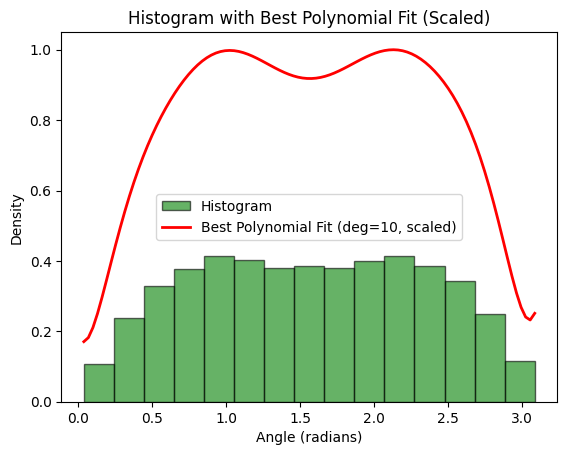

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Load data from a CSV file
file_path = "z_boson_electron_angles(SelectedEvents).csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Ensure the CSV has an 'Angle' column
if 'Angle' not in data.columns:
    raise ValueError("The CSV file must contain an 'Angle' column.")

# Step 2: Convert the angles from degrees to radians
data['Angle'] = np.radians(data['Angle'])  # Convert angles to radians

# Step 3: Plot the histogram
plt.hist(data['Angle'], bins=15, density=True, alpha=0.6, color='g', label='Histogram', edgecolor='black')

# Step 4: Fit polynomials of various degrees and choose the best fit
x = np.linspace(data['Angle'].min(), data['Angle'].max(), 100)
y, bin_edges = np.histogram(data['Angle'], bins=15, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

best_degree = None
best_fit = None
lowest_error = float('inf')
best_coeffs = None

# Test polynomial degrees from 1 to 10
for degree in range(1, 11):
    coeffs = np.polyfit(bin_centers, y, degree)
    poly_fit = np.poly1d(coeffs)
    error = mean_squared_error(y, poly_fit(bin_centers))
    if error < lowest_error:
        best_degree = degree
        best_fit = poly_fit
        best_coeffs = coeffs
        lowest_error = error

# Scale the polynomial so its maximum value is 1
scaling_factor = max(best_fit(x))
best_fit_scaled = lambda x: best_fit(x) / scaling_factor
scaled_coeffs = [coeff / scaling_factor for coeff in best_coeffs]

# Print the explicit form of the scaled best polynomial
print(f"Best polynomial (degree {best_degree}, scaled):")
print(" + ".join([f"{coeff:.15f}x^{i}" for i, coeff in enumerate(reversed(scaled_coeffs))]))

# Step 5: Convert the polynomial to sin and cos terms
def polynomial_to_trig(coeffs, degree):
    trig_terms = []
    for i, coeff in enumerate(reversed(coeffs)):
        power = degree - i
        # Convert powers of x to linear combinations of sin(x) and cos(x)
        if power == 1:
            trig_terms.append(f"{coeff:.15f} * sin(x) + {coeff:.15f} * cos(x)")
        elif power == 2:
            trig_terms.append(f"{coeff:.15f} * sin(x)^2 + {coeff:.15f} * cos(x)^2")
        elif power == 3:
            trig_terms.append(f"{coeff:.15f} * sin(x)^3 + {coeff:.15f} * cos(x)^3")
        else:
            trig_terms.append(f"{coeff:.15f} * x^{power}")  # For higher powers, you may expand further
    return " + ".join(trig_terms)

# Convert the polynomial expression to sin and cos terms
polynomial_trig = polynomial_to_trig(scaled_coeffs, best_degree)

print(f"Polynomial in terms of sin(x) and cos(x):")
print(polynomial_trig)

# Step 6: Overlay the scaled best polynomial fit curve
plt.plot(x, best_fit_scaled(x), 'r-', linewidth=2, label=f'Best Polynomial Fit (deg={best_degree}, scaled)')

# Customize plot
plt.title('Histogram with Best Polynomial Fit (Scaled)')
plt.xlabel('Angle (radians)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()
